## Image Segmentation

Import openCV and matplotlib

In [8]:
import cv2
import matplotlib.pyplot as plt

Take a picture, read it with openCV. 

In [12]:
im=cv2.imread('./IMG.JPG')

Use cvtColor to convert the image to the BGR2RGB color space.

In [13]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#plt.imshow(im)

In [ ]:
pic = plt.imread('1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)


In [15]:
from PIL import Image
import matplotlib.pyplot as plt
!pip3 install torch
import torch

     |████████████████████████████████| 81.1MB 3.2MB/s eta 0:00:01     |██████▉                         | 17.3MB 864kB/s eta 0:01:14


In [21]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /Users/blancalluch/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /Users/blancalluch/.cache/torch/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


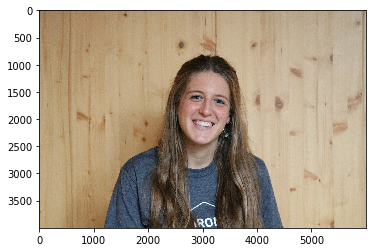

(6000, 4000)


In [30]:
# !wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./IMG.JPG')
plt.imshow(img); plt.show()
print(img.size)

In [37]:
# Apply the transformations needed
!pip3 install torchvision
import torchvision.transforms as T
trf = T.Compose([T.Resize(500),
                 T.CenterCrop(500),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [38]:
out = fcn(inp)['out']
print (out.shape)

torch.Size([1, 21, 500, 500])


In [39]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)

(500, 500)


In [40]:
# Define the helper function
def decode_segmap(image, nc=21):
   
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
 
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
   
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
     
  rgb = np.stack([r, g, b], axis=2)
  return rgb

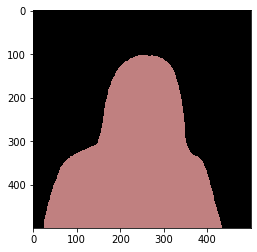

In [41]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

In [36]:
### 

In [26]:
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(256), 
                   T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

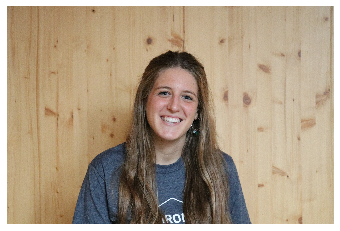

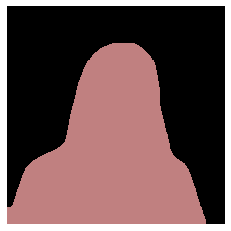

In [27]:
#!wget -nv https://images.pexels.com/photos/1996333/pexels-photo-1996333.jpeg -O horse.png
segment(fcn, './IMG.JPG')